Employee attrition can profoundly affect businesses, with short and long-term repercussions. It incurs costs, dampens morale, hampers operational efficiency, and undermines long-term competitiveness. This research seeks to develop an attrition prediction model.

In [79]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
sns.set()

In [80]:
pd.set_option('display.max_columns',None)
raw_data = pd.read_csv('C:/D/Data Science/Kaggle_Binary Classification with a Tabular Employee Attrition Dataset/train.csv')
raw_data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [81]:
# Convert selected object variables to integer data type: 
data = raw_data
data['Travel_Frequently'] = raw_data['BusinessTravel'].map({'Travel_Frequently':1,'Non-Travel':0,'Travel_Rarely':0}).astype(int)
data['Gender'] = raw_data['Gender'].map({'Male':1,'Female':0}).astype(int)
data['Department_RD'] = raw_data['Department'].map({'Research & Development':1,'Human Resources':0,'Sales':0 }).astype(int)
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0}).astype(int)
data.head()                                                                                                             

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Travel_Frequently,Department_RD
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,1,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,1,13,3,2,80,1,10,2,3,10,0,7,8,0,1,1
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,1,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,0,17,3,4,80,1,4,3,3,4,2,0,3,0,0,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,1,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,0,17,3,4,80,2,4,3,3,3,2,1,2,0,0,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,0,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,0,14,3,3,80,0,15,1,1,6,0,0,2,0,0,1
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,0,37,3,5,Manager,1,Single,19033,19805,1,Y,1,13,3,3,80,0,31,0,3,31,14,4,10,1,0,1


In [82]:
data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Travel_Frequently,Department_RD
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.0,2.757901,0.634466,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,0.238521,14.903399,3.127609,2.751342,80.0,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261,0.155635,0.695886
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.0,1.086835,0.481723,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,0.426306,3.420801,0.333753,1.077905,0.0,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192,0.362617,0.460169
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.0,2.000000,0.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.0,3.000000,1.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.0,4.000000,1.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,0.000000,17.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000,0.000000,1.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,1.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000,1.000000,1.000000


Generate a heatmap to visualize the correlation between employee attrition and predictor variables:

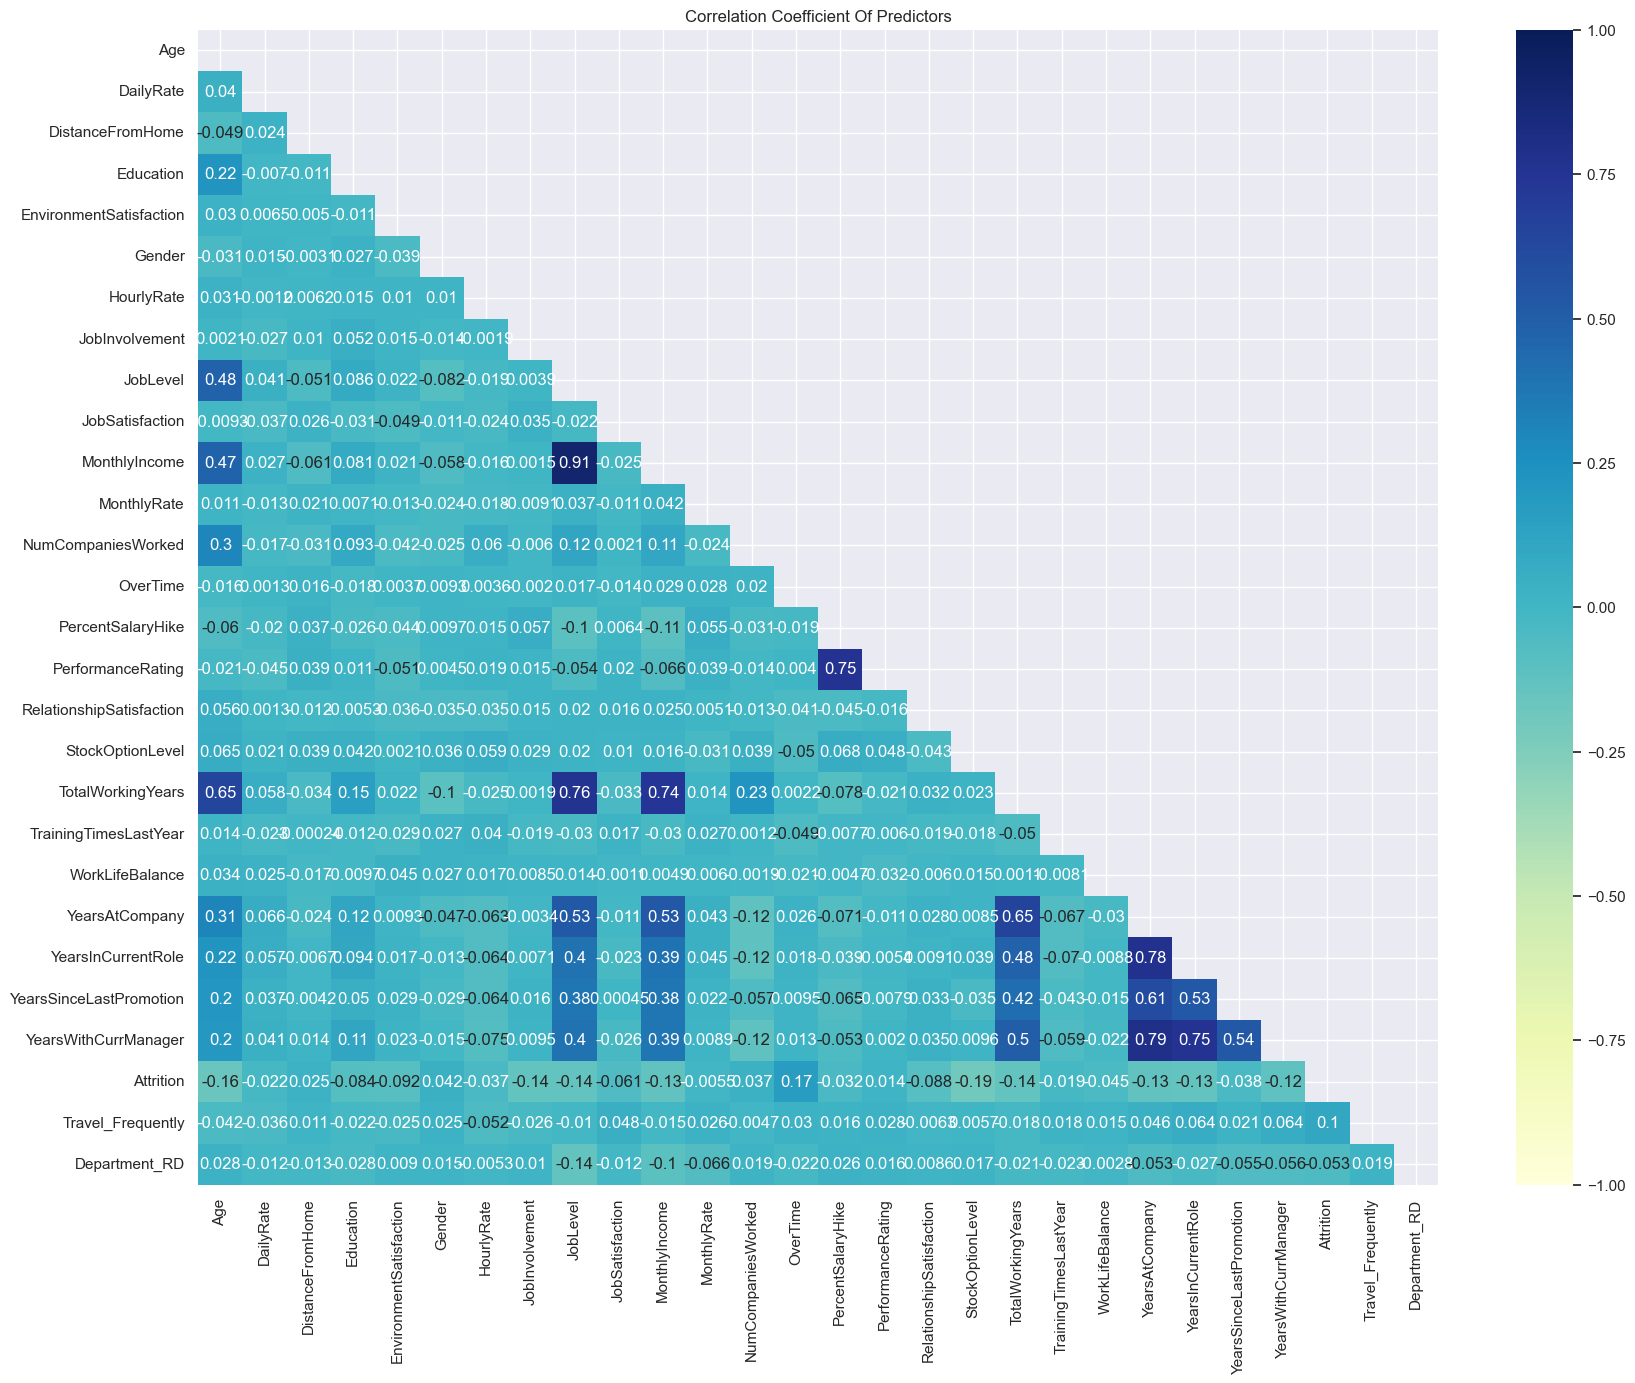

In [83]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(20,15))

# Drop the 'Object' variables and selected variables from the heatmap   
data_num = data.select_dtypes(exclude=['object'])
data_num = data_num.drop("EmployeeCount",axis=1)
data_num = data_num.drop("StandardHours",axis=1)
data_num = data_num.drop("id",axis=1)
        
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data_num.corr(), dtype=bool))

# Generate the heatmap
sns.heatmap(data_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1, cmap='YlGnBu')
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Predicting Variables: 

In [84]:
data_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Travel_Frequently,Department_RD
0,36,599,24,3,4,1,42,3,1,4,2596,5099,1,1,13,3,2,1,10,2,3,10,0,7,8,0,1,1
1,35,921,8,3,1,1,46,3,1,1,2899,10778,1,0,17,3,4,1,4,3,3,4,2,0,3,0,0,0
2,32,718,26,3,3,1,80,3,2,4,4627,16495,0,0,17,3,4,2,4,3,3,3,2,1,2,0,0,0
3,38,1488,2,3,3,0,40,3,2,1,5347,13384,3,0,14,3,3,0,15,1,1,6,0,0,2,0,0,1
4,50,1017,5,4,2,0,37,3,5,1,19033,19805,1,1,13,3,3,0,31,0,3,31,14,4,10,1,0,1


In [85]:
Y = data_num['Attrition']
X = data_num[['JobLevel','JobSatisfaction','MonthlyIncome','OverTime','YearsInCurrentRole','JobInvolvement','StockOptionLevel']]

Split the Data and Generate the Logistic Regression: 

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [87]:
# Generate a classifier using sklearn
clf = LogisticRegression(random_state=0).fit(X_train,Y_train)

# Print acc
clf.score(X_train, Y_train)

C:\Users\bluei\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8829231916480239

Generate the predicted Y:  

In [88]:
Y_pred = clf.predict(X_test)

Evaluation of the classifier:

In [89]:
# Import library
from sklearn.metrics import confusion_matrix, accuracy_score

# display confusion matrix
print(confusion_matrix(Y_test, Y_pred))
 
# display accuracy
print(accuracy_score(Y_test, Y_pred))

[[296   2]
 [ 35   3]]
0.8898809523809523


In [90]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       298
           1       0.60      0.08      0.14        38

    accuracy                           0.89       336
   macro avg       0.75      0.54      0.54       336
weighted avg       0.86      0.89      0.85       336



In [91]:
clf.score(X_train,Y_train)

0.8829231916480239

In [92]:
clf.score(X_test,Y_test)

0.8898809523809523

In [93]:
clf.coef_

array([[-1.22119219e-01, -1.71428483e-01, -6.55161665e-05,
         1.05608016e+00, -8.16653650e-02, -2.58803407e-01,
        -1.12044430e+00]])

The logistic regression analysis reveals significant effects of predictor variables on employee attrition. Specifically, a one-unit increase in Stock Option Level correlates with a 1.12 probability increase in attrition. Overtime work is associated with a 1.06 higher probability of attrition, while each unit increase in Job Involvement reduces attrition probability by 0.26.

With an accuracy of 0.89 and an f1-score of 0.85 on the test data, the logistic regression model effectively predicts employee attrition using seven variables: Job Level, Job Satisfaction, Monthly Income, Work Over Time, Years in Current Role, Job Involvement, and StockOptionLevel.